In [ ]:
import numpy as np 
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn')
%matplotlib inline 
import plotly.express as px
import plotly.offline as py

# font
import os
plt.rcParams['axes.unicode_minus'] = False
fontpath = "../input/nanum-plot/NanumGothic.ttf"
fontprop = font_manager.FontProperties(fname=fontpath,size=12)

In [ ]:
#print(os.listdir("../input/nanum-plot/NanumGothic.ttf"))

In [ ]:
time_age_raw = pd.read_csv('/kaggle/input/coronavirusdataset/TimeAge.csv')
region_raw = pd.read_csv('/kaggle/input/coronavirusdataset/Region.csv')
time_raw = pd.read_csv('/kaggle/input/coronavirusdataset/Time.csv')
weather_raw = pd.read_csv('/kaggle/input/coronavirusdataset/Weather.csv')
search_trend_raw = pd.read_csv('/kaggle/input/coronavirusdataset/SearchTrend.csv')
time_province_raw = pd.read_csv('/kaggle/input/coronavirusdataset/TimeProvince.csv')
time_gender_raw = pd.read_csv('/kaggle/input/coronavirusdataset/TimeGender.csv')
patient_info_raw = pd.read_csv('/kaggle/input/coronavirusdataset/PatientInfo.csv')
patient_route_raw = pd.read_csv('/kaggle/input/coronavirusdataset/PatientRoute.csv')
seoul_floating_raw = pd.read_csv('/kaggle/input/coronavirusdataset/SeoulFloating.csv')
case_raw = pd.read_csv('/kaggle/input/coronavirusdataset/Case.csv')

# 데이터 확인

Data Structure

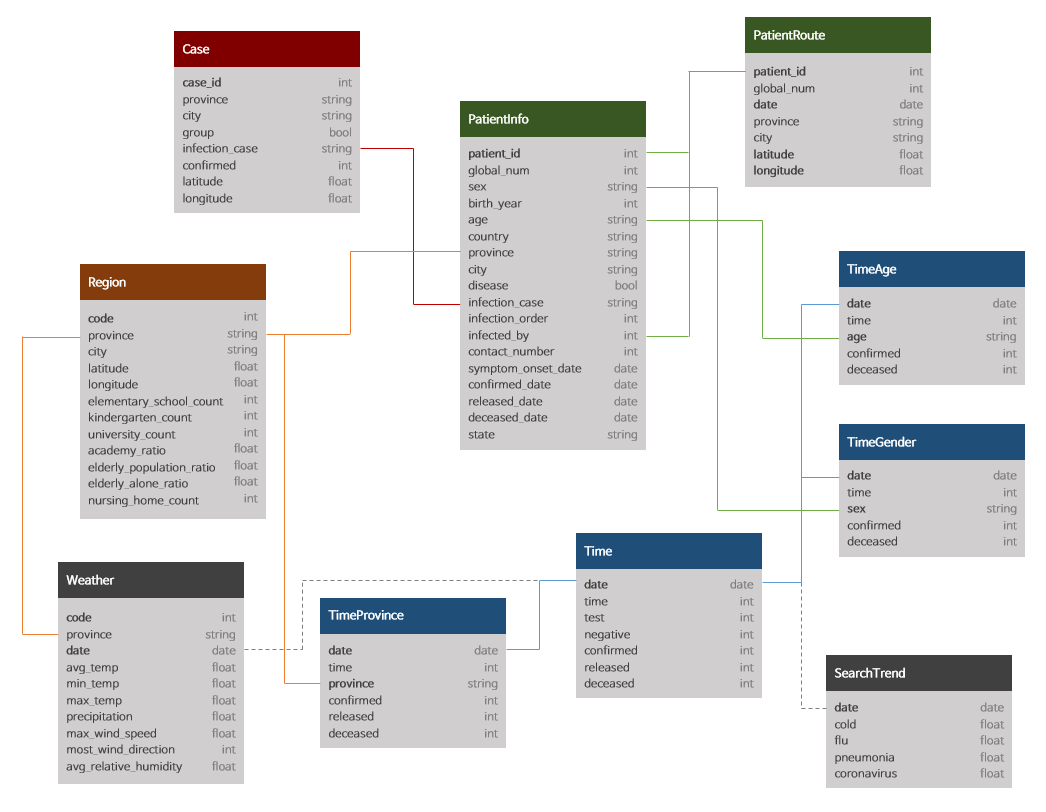

time_age_raw

일자별 연령대 확진자, 사망자
Time series data of COVID-19 status in terms of the age.
* date : YYYY-MM-DD
* time : Time
* age : the age of patients
* confirmed : the accumulated number of the confirmed 누적 확진자
* deceased : the accumulated number of the deceased 누적 사망자

In [ ]:
time_age_raw

In [ ]:
time_age_raw.tail(10)

In [ ]:
time_age_raw['age'].unique()

In [ ]:
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for ages in time_age_raw['age'].unique():
    num+=1
    plt.plot(time_age_raw.loc[time_age_raw['age']==ages, 'date'], time_age_raw.loc[time_age_raw['age']==ages, 'confirmed'], marker='', color=palette(num), linewidth=1, alpha=0.9, label=ages)
 
    # Add legend
    plt.legend(loc=2, ncol=2)

    # Add titles
    plt.title("연령별 확진자 수 추이", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Time")
    plt.ylabel("confirmed")
    plt.xticks(size=20, rotation=90)

region_raw

지역에 대한 통계 및 지리적 데이터

* code : the code of the region
* province : Special City / Metropolitan City / Province(-do)
* city : City(-si) / Country (-gun) / District (-gu)
* latitude : the latitude of the visit (WGS84)
* longitude : the longitude of the visit (WGS84)
* elementary_school_count : 초등학교 수
* kindergarten_count : 유치원 수
* university_count : 대학교 수
* academy_ratio : 학원 비율(? 정확한 의미 파악을 위해 질문 했습니다. 답변 오는대로 업데이트 하겠습니다.) 
* elderly_population_ratio : 노년층 비율(해당 지역 만 65세 이상 인구/해당 지역 전체 인구)
* elderly_alone_ratio : 독거 노인 비율
* nursing_home_count : 양로원 수

In [ ]:
region_raw

time_raw

시간대별 covid 상태

* date : YYYY-MM-DD
* time : Time (0 = AM 12:00 / 16 = PM 04:00)
* test : the accumulated number of tests 누적 검사자 수
* negative : the accumulated number of negative results 누적 음성자 수
* confirmed : the accumulated number of positive results 누적 확진자 수
* released : the accumulated number of releases 누적 완치자 수
* deceased : the accumulated number of deceases 누적 사망자

In [ ]:
time_raw

weather_raw

지역, 시간별 날씨

*  code : the code of the region
* province : Special City / Metropolitan City / Province(-do)
* date : YYYY-MM-DD
* avg_temp : 평균 온도
* min_temp : 최소 온도
* max_temp : 최고 온도
* precipitation : 일일 강수량
* max_wind_speed : 최고 풍속
* most_wind_direction : 최빈 풍향
* avg_relative_humidity : 평균 상대 습도(상대 습도 : 절대습도와 달리 기온에 따른 습하고 건조한 정도를 백분율로 나타낸 것이다.)

In [ ]:
weather_raw

search_trend_raw

네이버에서 키워드 검색한 트랜드 데이터


* date : YYYY-MM-DD
* cold : '감기' 검색량
* flu : '독감' 검색량
* pneumonia : '폐렴' 검색량
* coronavirus : '코로나 바이러스' 검색량


In [ ]:
search_trend_raw

time_province_raw

대한민국의 지역별 COVID-19 현황 시계열 데이터


* date : YYYY-MM-DD
* time : Time
* province : 시도
* confirmed : 누적 확진자수
* released : 누적 치료자수
* deceased : 누적 사망자수

In [ ]:
time_province_raw

time_gender_raw

COVID-19 상태 시계열 데이터

* date : YYYY-MM-DD
* time : Time
* sex : 성별
* confirmed : 누적 확진자수
* deceased : 누적 사망자수

In [ ]:
time_gender_raw

patient_info_raw

대한민국 COVID-19 개별 환자 역학 데이터

* patient_id : the ID of the patient
* global_num : 한국 확진자 순번
* sex : 성별
* birth_year : 생년
* age : 연령
* country : 국적
* province : 주거지역(시도)
* city : 주거지역(시군구)
* disease : TRUE: 기저질환 유 / FALSE: 기저질환 무
* infection_case : 감염 경로
* infection_order : 감염 순서
* infected_by : 감염 원인이 된 환자 ID
* contact_number : 접촉자수
* symptom_onset_date : 증상 발생일
* confirmed_date : 확진 일자
* released_date : 치료 일자
* deceased_date : 사망 일자
* state : 격리 / 완치 / 사망

In [ ]:
patient_info_raw

patient_route_raw

COVID-19 환자 경로 데이터

* patient_id : the ID of the patient
* global_num : 확진자 순서
* date : YYYY-MM-DD
* province : 시도
* city : 시군구
* latitude : the latitude of the visit (WGS84)
* longitude : the longitude of the visit (WGS84)

In [ ]:
patient_route_raw

seoul_floating_raw

서울시 유동인구 데이터(ref. SK텔레콤 빅데이터 허브)


* date : YYYY-MM-DD
* hour : Hour
* birth_year : 유동인구 연령대
* sex : 유동인구 성별
* province : 시도
* city : 시군구
* fp_num : 유동인구 수

In [ ]:
seoul_floating_raw

case_raw

COVID-19 감염사례 자료

* case_id : the ID of the infection case
* province : 시도
* city : 시군구
* group : TRUE: 단체 감염 / FALSE: 개별 감염
* infection_case : 감염 장소 

>'overseas inflow' : 해외 감염.

>'etc' : 개별적인 케이스(신천지 같은 사건이 아닌), 조사 전 or 조사 중에 임시로 분류 상태

* confirmed : 누적 확진자수
* latitude : the latitude of the group (WGS84)
* longitude : the longitude of the group (WGS84)

In [ ]:
case_raw

# Data Creation

In [ ]:
time = time_raw.copy()
time.index = time['date']
confirmed = time['confirmed']
deaths= time['deceased']
recoveries = time['released']

In [ ]:
dates = confirmed.keys()
korea_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i]
    death_sum = deaths[i]
    recovered_sum = recoveries[i]
    
    # confirmed, deaths, recovered, and active
    korea_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

Merge

In [ ]:
patient_route = patient_route_raw.copy()
patient_route = patient_route.rename(columns={"province": "province_route", "city": "city_route", "date": "date_route","latitude":"latitude_route", "longitude":"longitude_route"})

region = region_raw.copy()
region = region.rename(columns={"code": "code_region"})

patient_raw = pd.merge(patient_info_raw, patient_route, on=['patient_id', 'global_num'], how='left')
patient_raw = pd.merge(patient_info_raw, region, on=['province', 'city'], how='left')

date_province_raw = pd.merge(time_province_raw, region, on=['province'], how='left')

In [ ]:
patient_raw

In [ ]:
date_province_raw

# Simple EDA

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(dates, korea_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
plt.show()

In [ ]:
df = time_province_raw.tail(17)

plt.figure(figsize=(16, 9))
plt.barh(df['province'], df['confirmed'])
plt.title('# of Covid-19 Confirmed Cases in Provinces', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
confirmed[-1]

In [ ]:
time_raw.index = time_raw['date']
confirmed = time_raw['confirmed']
deaths= time_raw['deceased']
recoveries = time_raw['released']

count = [confirmed[-1], deaths[-1], recoveries[-1]]
state = ['confired', 'deaths',' recoveries']

states = pd.DataFrame()
states["count"] = count
states["status"] =  state
fig = px.pie(states,
             values="count",
             names="status",
             title="Current state of patients",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

In [ ]:
fig = px.pie( values=patient_route_raw.groupby(['city']).size().values,names=patient_route_raw.groupby(['city']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

# Epidemiology

완치율(Recovery rate)

In [ ]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(dates, recovery_rate, color='orange')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery Rate', 'mean recovery rate ='+str(round(mean_recovery_rate, 4))], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
plt.show()

**사망률 (Mortality rate)**

In [ ]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'mean mortality rate='+str(round(mean_mortality_rate, 4))], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
plt.show()